# Autoencoders

Un **autoencoder** es una red neuronal artificial utilizada para el aprendizaje no supervisado de codificaciones eficientes. El objetivo de un autoencoder es aprender una representación (codificación) para un conjunto de datos, generalmente con el propósito de reducir la dimensionalidad. Recientemente, el concepto de autoencoder se ha utilizado más ampliamente para aprender modelos generativos de datos.

<img src="images/autoencoder.png" width="80%"/>


## Ejemplo: autoencoder para MNIST

Vamos a crear un autoencoder para el conjunto MNIST. Podemo ir variando los diferentes hiperparámetros que tenemos para ver el efecto que produce en el resultado.

<img src="images/autoencoder_mnist.png" width="80%"/>



Using TensorFlow backend.


(60000, 784)
(10000, 784)
Epoch 1/3
60000/60000 [==============================] - 10s 167us/step - loss: 0.1801
Epoch 2/3
60000/60000 [==============================] - 9s 150us/step - loss: 0.1341
Epoch 3/3
60000/60000 [==============================] - 9s 151us/step - loss: 0.1265


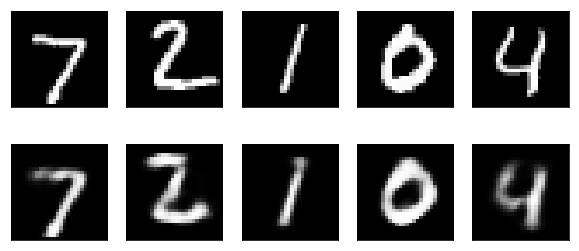

In [1]:
import numpy as np
import utilidades


from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

input_size = 784
hidden_size = 32
code_size = 16

# Activation functions: relu, relu, relu, sigmoid
# Optimizer: adam, loss: binaty_crossentropy

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=3)

utilidades.plot_autoencoder_outputs(autoencoder, 5, (28, 28), x_test)


## Autoencoder para eliminar ruido

Un autoencoder aprende a comprimir los datos de la capa de entrada en un código corto, y luego descomprimir ese código en algo que coincida con los datos originales. Esto fuerza al autoencoder a participar en la reducción de dimensionalidad, por ejemplo, aprendiendo a ignorar el ruido. Por tanto, otra de las aplicaciones de los autoencoderes es suriprimir el ruido en imágenes.

<img src="images/autoencoder_noise.png"/ width="80%">

(60000, 784)
(10000, 784)
Epoch 1/3
60000/60000 [==============================] - 14s 229us/step - loss: 0.1528
Epoch 2/3
60000/60000 [==============================] - 14s 238us/step - loss: 0.1138
Epoch 3/3
60000/60000 [==============================] - 16s 275us/step - loss: 0.1071


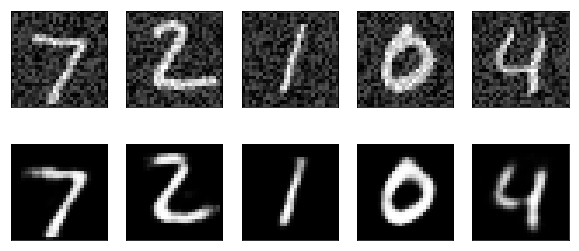

In [2]:
import numpy as np
import warnings
import utilidades

warnings.filterwarnings('ignore')

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise = np.random.rand((*np.shape(x_train))).astype('float32')
x_train_noised = x_train + noise * 0.5

print(x_train.shape)
print(x_test.shape)

input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noised, x_train, epochs=3)

noise = np.random.rand((*np.shape(x_test))).astype('float32')
x_test_noised = x_test + noise * 0.5

utilidades.plot_autoencoder_outputs(autoencoder, 5, (28, 28), x_test_noised)


Un autoencoder puede mejorar sustancialmente el entrenamiento de una red profunda. Es posible ir pre-entrenando las diferentes capas convolutivas mediante la técnica de autoencoder para disponer de unos pesos iniciales favorables antes del entrenamiento.